In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
P = np.array([0.4, 0.6])  # probability measure
S0 = 10  # stock price at t=0
S1 = np.array([20, 5])  # possible stock prices at t=1
np.dot(P, S1)  # expected value of S1

11.0

In [6]:
R = S1 - S0  # possible returns at S1
E_R = np.dot(P, R)  # Expected return
E_r = E_R / S0  # Expected rate of return

print("Expected return:", E_R)
print("Expected rate of return:", E_r)

Expected return: 1.0
Expected rate of return: 0.1


In [7]:
# Variance of returns
sigma2 = np.dot(P, (R/S0 - E_r)**2)
sigma = np.sqrt(sigma2)

print("variance:", sigma2)
print("std:", sigma)

variance: 0.54
std: 0.7348469228349535


In [8]:
B = [10, np.array([11, 11])]
S = [10, np.array([20, 5])]
M = np.array([B[1], S[1]]).T  # t=1 prices matrix
M

array([[11, 20],
       [11,  5]])

In [9]:
K = 15
C1 = np.maximum(S[1]-K, 0)  # payoffs of call option with K=15
C1

array([5, 0])

In [10]:
phi = np.linalg.solve(M, C1)  # M @ phi = C1, phi is the solution to this equation.
phi

array([-0.15151515,  0.33333333])

In [11]:
# Price of the call option by replication
C0 = np.dot(phi, np.array([B[0], S[0]]))
print("C0 =", C0)

C0 = 1.8181818181818183


Let there be 2 different stocks and 1 risk-free bond

In [12]:
S2 = [8, np.array([7, 12])]
S1 = [10, np.array([5, 20])]
B = [10, np.array([11, 11])]

M = np.array([B[1], S2[1]]).T
M

array([[11,  7],
       [11, 12]])

In [13]:
phi = np.linalg.solve(M, C1)
phi

array([ 1.09090909, -1.        ])

# Value Process of Portfolio

$V_1(\phi) = \begin{bmatrix}
B_1 S_1^u \\
B_1 S_1^d
\end{bmatrix} \cdot \begin{bmatrix}
b \\
s
\end{bmatrix} = \begin{bmatrix}
b \times B_1 + s \times S_1^u \\
b \times B_1 + s \times S_1^d
\end{bmatrix} $

In [14]:
from numpy.random import default_rng
rng = default_rng(100)  # fix the seed
n = 1000
b = rng.random(n)

s = (1-b)  # weight of stock is 1 minus the bond so the total weight is always 1
B = [10, np.array([11, 11])]
S = [10, np.array([20, 5])]

def portfolio(b, s, B, S):
    M = np.array([B[1], S[1]]).T
    print("M =\n", M)
    phi = np.array([b, s])
    print("phi =\n", phi)
    V1 = M @ phi
    print("V1.shape =", V1.shape)
    return V1.T

V1 = portfolio(b, s, B, S)
V1

M =
 [[11 20]
 [11  5]]
phi =
 [[0.83498163 0.59655403 0.28886324 ... 0.82992229 0.02877373 0.16068911]
 [0.16501837 0.40344597 0.71113676 ... 0.17007771 0.97122627 0.83931089]]
V1.shape = (2, 1000)


array([[12.48516533, 10.00988978],
       [14.63101376,  8.57932416],
       [17.40023082,  6.73317945],
       ...,
       [12.53069938,  9.97953375],
       [19.74103643,  5.17264238],
       [18.55379799,  5.96413468]])

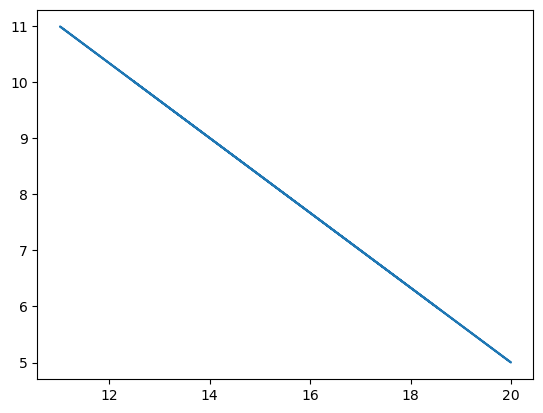

In [15]:
plt.plot(V1[:, 0], V1[:, 1])

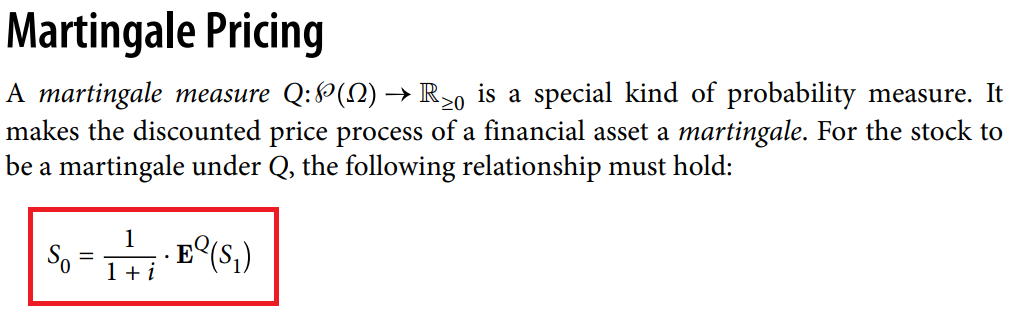

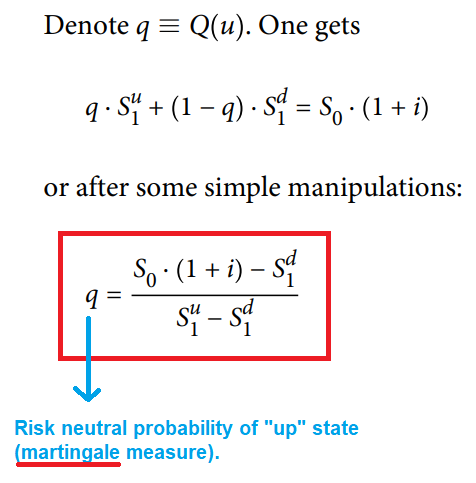

# Fundamental Theorems of Asset Pricing

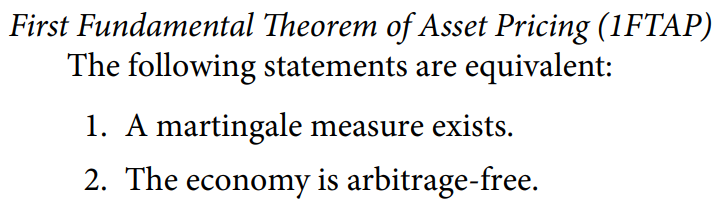

In [16]:
B = [10, np.array([11, 11])]
S = [10, np.array([20, 5])]


def r(B):
    """Calculates the risk-free rate from the bond price process.

    Args:
        B (list): bond price process
        
    """
    return (B[1][1] - B[0]) / B[0]

def q(S, B):
    """Calculates the martingale probability measure
    from the price processes of the Stock and the Bond.
    Return the probability of "up" state.

    Args:
        S (list): stock price process
        B (list): bond price process
    """
    q = (S[0] * (1 + r(B)) - S[1][1]) / (S[1][0] - S[1][1])
    return q
    
r(B)

0.1

In [17]:
q(S, B)

0.4

In [18]:
Q = np.array([q(S, B), 1 - q(S, B)])  # Martingale probability measure
Q

array([0.4, 0.6])

In [19]:
K = 15
C1 = np.maximum(S[1]-K, 0)  # payoffs of call option with K=15
C1

array([5, 0])

In [20]:
def E_Q(C1, Q):
    """Calculates the expected value at t=1 according to the martingale probability measure.

    Args:
        C1 (np.array): Payoff vector of t=1 for ANY security.
        Q (np.array): Martingale probability measure, (q, 1-q)
    """
    return np.dot(C1, Q)

E_Q(C1, Q)

2.0

In [21]:
# Martingale price is the 
# expected value at t=1 according to the martingale probability measure, DISCOUNTED by the risk-free rate:

E_Q(C1, Q) / (1 + r(B))

1.8181818181818181

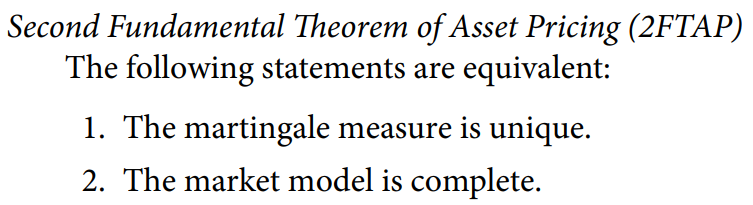

# Three State Economy

In [22]:
rng = default_rng(100)
B = [10, np.array([11, 11, 11])]
S = [10, np.array([20, 10, 5])]
n = 1000
b = rng.random(n)
s = rng.random(n)

A = np.array([b[i]*B[1] + s[i]*S[1] for i in range(n)])
print(A)

[[19.86232075 14.52355934 11.85417864]
 [26.35796184 16.46002807 11.51106118]
 [11.64939184  7.41344375  5.2954697 ]
 ...
 [17.69705865 13.41310193 11.27112357]
 [ 5.67190743  2.99420923  1.65536013]
 [16.68660962  9.22709493  5.49733758]]


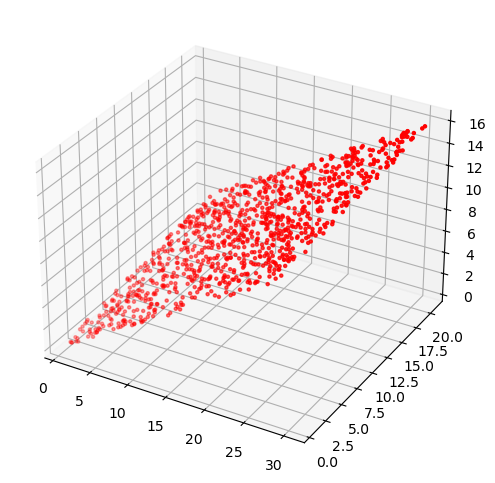

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c="r", marker=".")

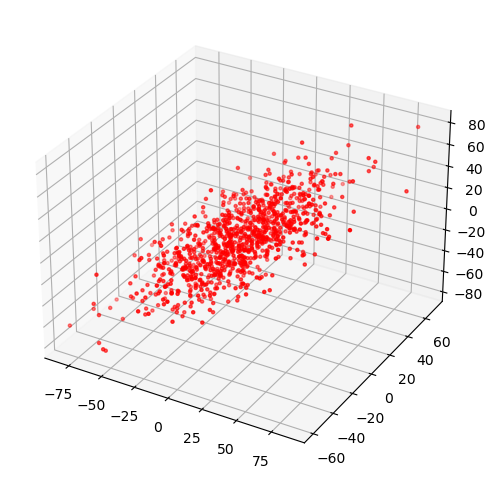

In [24]:
# Adding a third asset, a stock whose price process is linearly independent from the first stock
B = [10, np.array([11, 11, 11])]
S = [10, np.array([20, 10, 5])]
S2 = [8, np.array([5, 10, 20])]

n = 1000
b = np.random.normal(0, 1, n)
s = np.random.normal(0, 1, n)
s2 = np.random.normal(0, 1, n)

A = np.array([b[i]*B[1] + s[i]*S[1] + s2[i]*S2[1] for i in range(n)])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c="r", marker=".")

# Super-replication

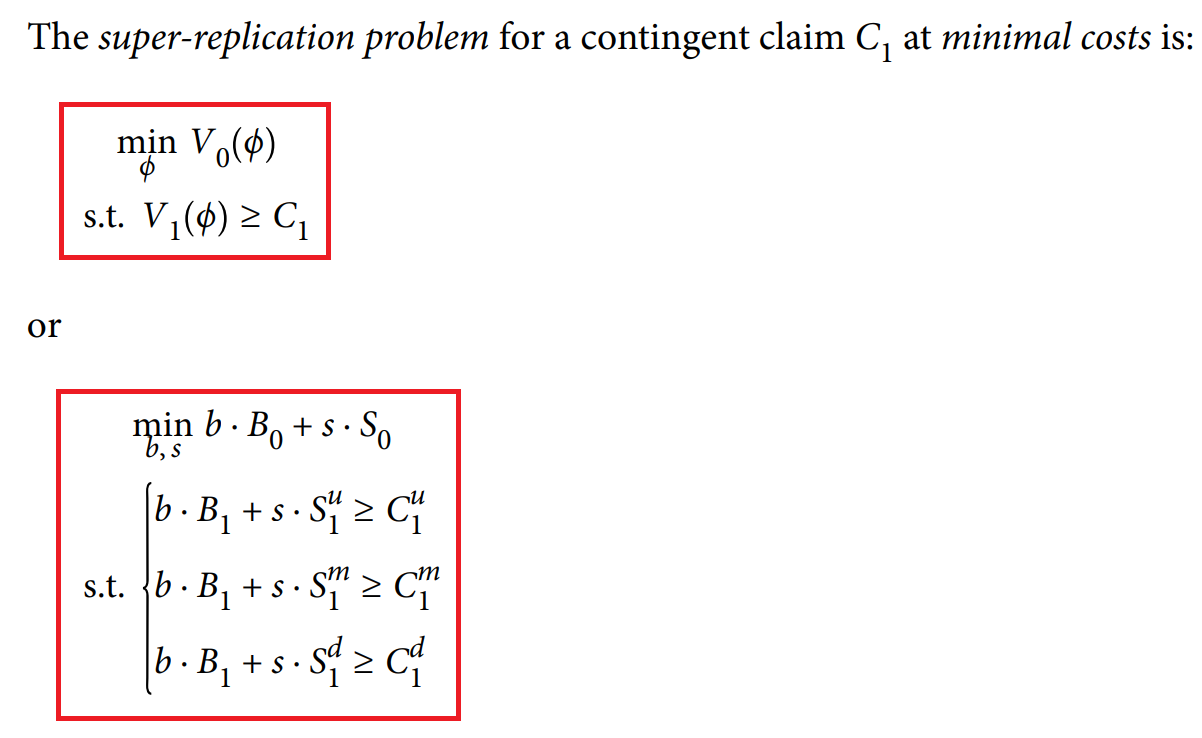

We'll try to super-replicate the cost of the first Arrow-Debreu Security

$\gamma^u = (1, 0, 0)$

by minimizing $\phi = (b, s)$ with the constraint $V_1(\phi) \ge \gamma^u$ element-wise.

In [25]:
import scipy.optimize

B = [10, np.array([11, 11, 11])]
S = [10, np.array([20, 10, 5])]
M0 = np.array([B[0], S[0]])
M = np.array([B[1], S[1]]).T
print("M0 =\n", M0)
print("M =\n", M)
C1 = np.array([1, 0, 0])  # first Arrow-Debreu security

# Constraints
cons = {"type": "ineq", "fun": lambda phi: M@phi - C1}  # payoffs of replication portfolio >= payoffs of C1, element-wise
result = scipy.optimize.minimize(lambda phi: M0@phi, (0.01, 0.01), method="SLSQP", constraints=cons)
result

M0 =
 [10 10]
M =
 [[11 20]
 [11 10]
 [11  5]]


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.36363636363557533
       x: [-3.030e-02  6.667e-02]
     nit: 2
     jac: [ 1.000e+01  1.000e+01]
    nfev: 6
    njev: 2

In [26]:
optimal_phi = result["x"]
optimal_phi

array([-0.03030303,  0.06666667])

In [27]:
# Replication portfolio cost today
np.dot(optimal_phi, M0)

0.36363636363557533

___________________

# Static Economy

In [28]:
np.set_printoptions(precision=5, suppress=True)

rng = default_rng(100)
I = 1000  # number of states in the state space omega.
S = rng.normal(loc=100, scale=20, size=I)  # 1000 different stock price paths with mean 100, std 20

P = rng.random(I)
P = P / P.sum()  # normalize the probabilities, thus creating probability measures that sum up to 1.
P.sum()

1.0

In [29]:
np.dot(P, S)  # Calculates the expected value according to the probability measure

100.7198164018502

# Financial Assets

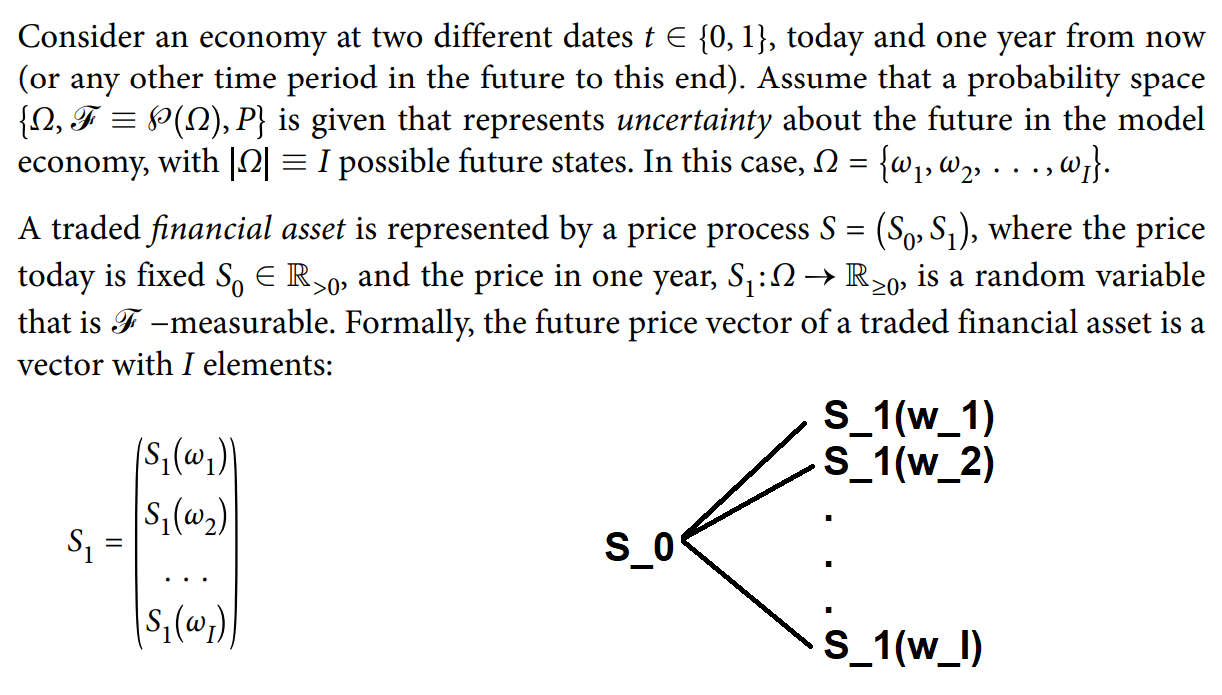

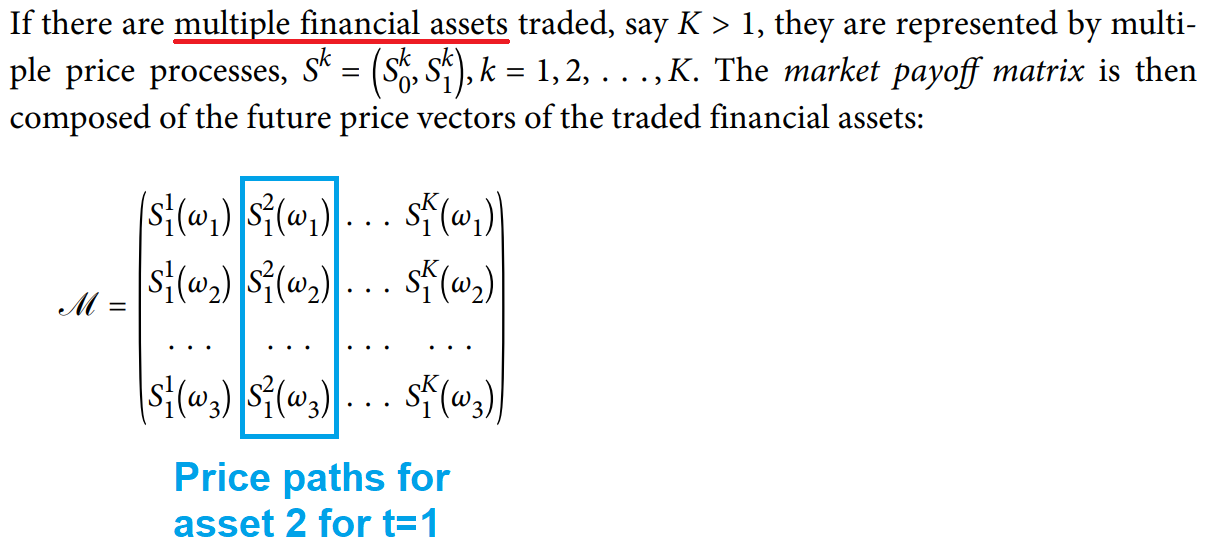

In [31]:
# Payoff processes for t=1.
# Columns are different assets, rows are different states (paths).
M = np.array([
    [11, 25, 0, 0, 25],
    [11, 20, 30, 15, 25],
    [11, 10, 0, 20, 10],
    [11, 5, 30, 15, 0],
    [11, 0, 0, 0, 0]
])

# Price vector f
M0 = np.array([10, 10, 10, 10, 10]).T

mu = (M.mean(axis=0) - M0) / M0  # mean rate of returns for different assets
sigma = ((M - M0)/M0).std(axis=0)  # standard deviation of returns for different assets

print("mu =", mu)
print("sigma =", sigma)

mu = [0.1 0.2 0.2 0.  0.2]
sigma = [0.      0.92736 1.46969 0.83666 1.1225 ]


Note that the first asset has $\sigma = 0$, because it is a bond.

In [34]:
# Define a call option for the first stock above
K = 15  # strike
C1 = np.maximum(M[:, 1]-K, 0)  # payoff for the call option
C1

array([10,  5,  0,  0,  0])

In [35]:
# Solve for M @ phi = C1
phi = np.linalg.solve(M, C1)
phi  # weights of the replication portfolio

array([ 0.     ,  0.5    ,  0.01667, -0.2    , -0.1    ])

In [38]:
# Price for the replication portfolio
price = M0 @ phi
print("C0 =", np.round(price, 2))

C0 = 2.17


# Financial Theory sayfa 129'da kaldım !